In [2]:
# Import required Libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from PIL import Image
import glob
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
# Loading the dataset
def load_images_from_path(folder_path, target_size=(128, 128)):
    image_list = []
    for filename in glob.glob(f'{folder_path}/*.png'):  # Match .png files
        im = Image.open(filename).convert('L')
        #im = Image.open(filename)
        # Resize image to a consistent size
        im = im.resize(target_size)
        
        # Convert image to a NumPy array
        im_array = np.array(im)
        
        # Add to the list
        image_list.append(im_array)
    
    # Convert list to a NumPy array
    return np.array(image_list)
    
x_train = load_images_from_path('Downloads/mvtec_anomaly_detection/toothbrush/train/good')
x_test = load_images_from_path('Downloads/mvtec_anomaly_detection/toothbrush/test/good')
test_defective_images = load_images_from_path('Downloads/mvtec_anomaly_detection/toothbrush/test/defective')
ground_truth_defective_images = load_images_from_path('Downloads/mvtec_anomaly_detection/toothbrush/ground_truth/defective' )

In [4]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 128 * 128))
x_test = x_test.reshape((-1, 128 * 128))
test_defective_images = test_defective_images.reshape((-1, 128 * 128))

In [5]:
# Build the AutoEncoder model
model = keras.Sequential([
    # Encoder: Reduce dimensionality, learn the most important features
    keras.layers.Dense(1024, activation='relu', input_shape=(x_train.shape[1],)), # Reducing dimension to 128
    keras.layers.Dense(512, activation='relu'), # Reducing dimension to 128
    keras.layers.Dense(256, activation='relu'), # Further reducing dimension to 64
    keras.layers.Dense(128, activation='relu'), # Further reducing to the most compact form (bottleneck layer)

    # Decoder: Reconstruct the image from the reduced representation
    keras.layers.Dense(256, activation='relu'), # Start expanding dimension
    keras.layers.Dense(512, activation='relu'), # Start expanding dimension
    keras.layers.Dense(1024, activation='relu'), # Continue expanding dimension
    #keras.layers.Dense(2048, activation='relu'), # Continue expanding dimension

    keras.layers.Dense(x_train.shape[1], activation='sigmoid') # Restore to original image size
])

model.compile(optimizer='adam', loss='mae')

# Train the model
history = model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

/home/ayam/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-10 04:18:37.883493: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-01-10 04:18:37.909613: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2025-01-10 04:18:37.944190: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2025-01-10 04:18:37.968371: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


Epoch 1/20


2025-01-10 04:18:38.079641: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2025-01-10 04:18:38.131191: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3464 - val_loss: 0.3431
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - loss: 0.3439 - val_loss: 0.3018
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step - loss: 0.3027 - val_loss: 0.1413
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step - loss: 0.1421 - val_loss: 0.1190
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step - loss: 0.1186 - val_loss: 0.1337
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step - loss: 0.1331 - val_loss: 0.1512
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step - loss: 0.1505 - val_loss: 0.1569
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step - loss: 0.1564 - val_loss: 0.1591
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step - loss: 0.1586 - val_loss: 0.1596
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - loss: 0.1590 - val_loss: 0.1581
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step - loss: 0.1576 - val_loss: 0.1556
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step - loss: 0.1550 - val_loss: 0.1520
Epo

In [6]:
# Function to calculate reconstruction loss
def calculate_reconstruction_loss(data, model):
    reconstructions = model.predict(data)
    reconstruction_errors = np.mean(np.abs(data - reconstructions), axis=1)
    return reconstruction_errors

In [7]:
# Evaluate the model
reconstruction_loss_normal = calculate_reconstruction_loss(x_test, model)
reconstruction_loss_anomalous = calculate_reconstruction_loss(test_defective_images, model)
# Print average reconstruction loss
print(f"Average Reconstruction Loss for Normal Data: {np.mean(reconstruction_loss_normal)}")
print(f"Average reconstruction Loss for Anomalous Data: {np.mean(reconstruction_loss_anomalous)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Average Reconstruction Loss for Normal Data: 0.05042530596256256
Average reconstruction Loss for Anomalous Data: 47.57646179199219


<Axes: ylabel='Count'>

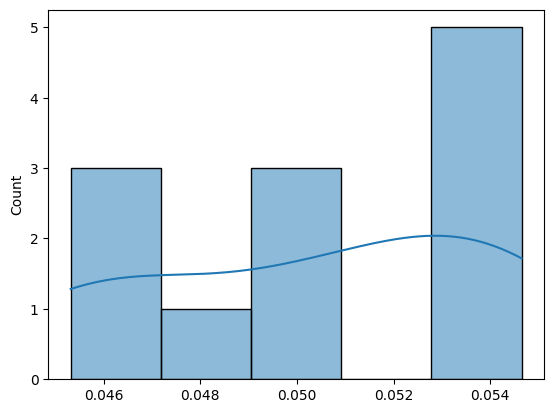

In [8]:
import seaborn as sns  
sns.histplot(reconstruction_loss_normal, kde=True)  # If the plot is bell shaped then we will use the mean + 3*std threshold,
# but if it's skewed then we will use the percentile threshold

In [9]:
threshold = np.percentile(reconstruction_loss_normal, 95) # We chose this way because the error looks skewed

In [10]:
# Classify normal test data
normal_predictions = reconstruction_loss_normal > threshold

# Classify anomalous test data
anomalous_predictions = reconstruction_loss_anomalous > threshold

In [16]:
# Assuming you have ground truth labels (1 for anomaly, 0 for normal)
ground_truth_normal = np.zeros_like(reconstruction_loss_normal)  # Normal data ground truth
ground_truth_anomalous = np.ones_like(reconstruction_loss_anomalous)  # Anomalous data ground truth

# Combine predictions and ground truth
all_predictions = np.concatenate((normal_predictions, anomalous_predictions))
all_ground_truth = np.concatenate((ground_truth_normal, ground_truth_anomalous))

# Calculate metrics
accuracy = accuracy_score(all_ground_truth, all_predictions)
precision = precision_score(all_ground_truth, all_predictions)
recall = recall_score(all_ground_truth, all_predictions)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1 Score: 0.98


In [17]:
# Reshape flattened data back to 2D with channel dimension
x_train_reshaped = x_train.reshape((-1, 128, 128, 1))  # Assuming grayscale images
x_test_reshaped = x_test.reshape((-1, 128, 128, 1))
test_defective_images_reshaped = test_defective_images.reshape((-1, 128, 128, 1))

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Flip horizontally
    tf.keras.layers.RandomRotation(0.1),      # Rotate up to 10%
    tf.keras.layers.RandomBrightness(0.2),    # Adjust brightness
])
x_train_augmented = data_augmentation(x_train_reshaped)
x_train_augmented_flat = x_train_augmented.numpy().reshape((-1, 128 * 128))

In [18]:
# Try removing the noise in the images
import cv2
denoised_x_train = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in x_train_augmented_flat])

In [19]:
# Try image clipping
clip_x_train = np.clip(x_train, 0.0, 1.0)
clip_x_test = np.clip(x_test, 0.0, 1.0)


In [20]:
# Build the AutoEncoder model
aug_model = keras.Sequential([
    # Encoder: Reduce dimensionality, learn the most important features
    keras.layers.Dense(1024, activation='relu', input_shape=(x_train.shape[1],)), 
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 

    # Decoder: Reconstruct the image from the reduced representation
    keras.layers.Dense(256, activation='relu'), # Start expanding dimension
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(1024, activation='relu'), # Continue expanding dimension
    #keras.layers.Dense(2048, activation='relu'), # Continue expanding dimension

    keras.layers.Dense(x_train.shape[1], activation='sigmoid') # Restore to original image size
])

aug_model.compile(optimizer='adam', loss='mae')

# Train the model
#aug_history = aug_model.fit(x_train_augmented_flat, x_train_augmented_flat, epochs=20, batch_size=256, validation_data=(x_test, x_test))
#aug_history = aug_model.fit(denoised_x_train, denoised_x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))
aug_history = aug_model.fit(clip_x_train, clip_x_train, epochs=20, batch_size=256, validation_data=(clip_x_test, clip_x_test))

/home/ayam/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.3465 - val_loss: 0.3437
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step - loss: 0.3445 - val_loss: 0.3111
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step - loss: 0.3120 - val_loss: 0.1641
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step - loss: 0.1650 - val_loss: 0.1141
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step - loss: 0.1137 - val_loss: 0.1235
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - loss: 0.1230 - val_loss: 0.1408
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step - loss: 0.1402 - val_loss: 0.1446
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step - loss: 0.1440 - val_loss: 0.1432
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step - loss: 0.1427 - val_loss: 0.1402
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - loss: 0.1396 - val_loss: 0.1349
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step - loss: 0.1344 - val_loss: 0.1268
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - loss: 0.1263 - val_loss:

In [21]:
# Evaluate the model
aug_reconstruction_loss_normal = calculate_reconstruction_loss(x_test, aug_model)
aug_reconstruction_loss_anomalous = calculate_reconstruction_loss(test_defective_images, aug_model)
# Print average reconstruction loss
print(f"Average Reconstruction Loss for Normal Data: {np.mean(aug_reconstruction_loss_normal)}")
print(f"Average reconstruction Loss for Anomalous Data: {np.mean(aug_reconstruction_loss_anomalous)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Average Reconstruction Loss for Normal Data: 0.0450887493789196
Average reconstruction Loss for Anomalous Data: 47.573848724365234


In [22]:
aug_threshold = np.percentile(aug_reconstruction_loss_normal, 95) # We chose this way because the error looks skewed

In [23]:
# Classify normal test data
aug_normal_predictions = aug_reconstruction_loss_normal > aug_threshold

# Classify anomalous test data
aug_anomalous_predictions = aug_reconstruction_loss_anomalous > aug_threshold

In [24]:
# Assuming you have ground truth labels (1 for anomaly, 0 for normal)
ground_truth_normal = np.zeros_like(aug_reconstruction_loss_normal)  # Normal data ground truth
ground_truth_anomalous = np.ones_like(aug_reconstruction_loss_anomalous)  # Anomalous data ground truth

# Combine predictions and ground truth
all_predictions = np.concatenate((aug_normal_predictions, aug_anomalous_predictions))
all_ground_truth = np.concatenate((ground_truth_normal, ground_truth_anomalous))

# Calculate metrics
accuracy = accuracy_score(all_ground_truth, all_predictions)
precision = precision_score(all_ground_truth, all_predictions)
recall = recall_score(all_ground_truth, all_predictions)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1 Score: 0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


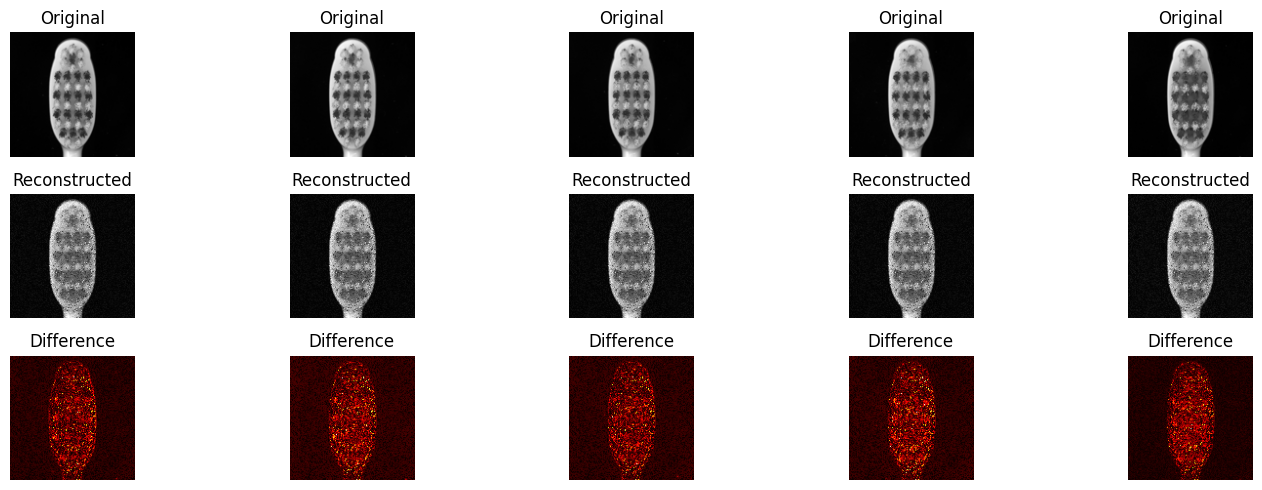

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


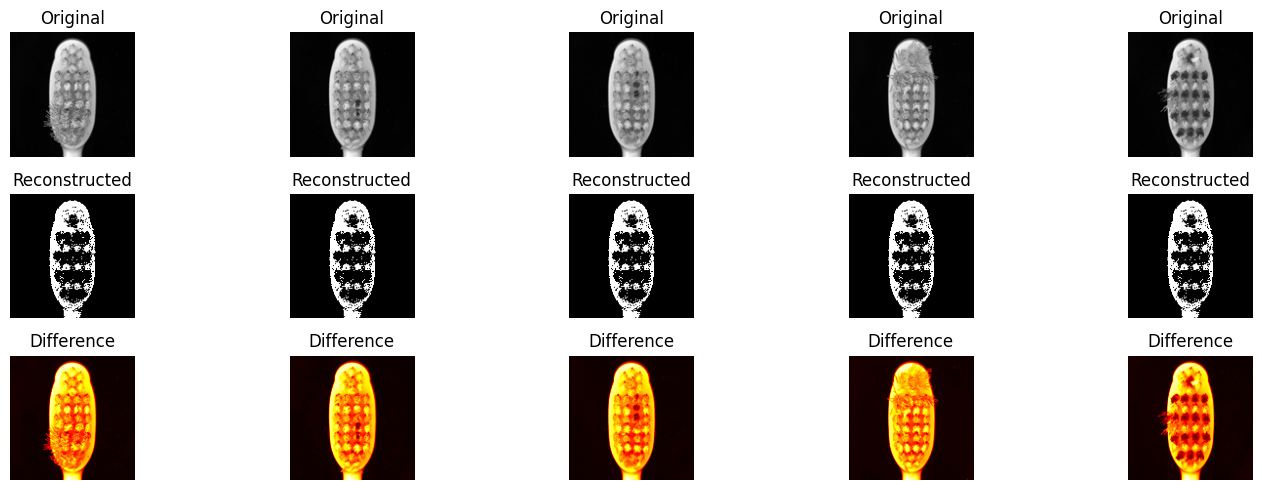

In [25]:
def display_images_with_diff(original, reconstructed, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Original Image
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i].reshape(128, 128), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed Image
        plt.subplot(3, num_images, i + num_images + 1)
        plt.imshow(reconstructed[i].reshape(128, 128), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

        # Difference Map
        diff = np.abs(original[i] - reconstructed[i])
        plt.subplot(3, num_images, i + 2 * num_images + 1)
        plt.imshow(diff.reshape(128, 128), cmap='hot')
        plt.title("Difference")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example for normal data
reconstructed_normal = aug_model.predict(clip_x_test)
#display_images_with_diff(x_test, reconstructed_normal)
display_images_with_diff(clip_x_test, reconstructed_normal)

# Example for anomalous data
reconstructed_anomalous = aug_model.predict(test_defective_images)
display_images_with_diff(test_defective_images, reconstructed_anomalous)


In [26]:
import numpy as np

reconstruction_loss = np.mean((x_test - reconstructed_normal) ** 2, axis=1)
print("Reconstruction Loss:", reconstruction_loss)


Reconstruction Loss: [0.00422556 0.00467079 0.00412628 0.00415274 0.00416768 0.00402418
 0.00382444 0.00438872 0.00614573 0.00619501 0.00596402 0.0061104 ]


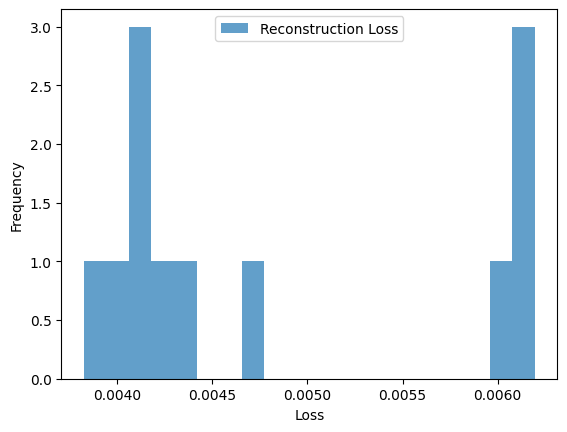

In [27]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_loss, bins=20, alpha=0.7, label='Reconstruction Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [28]:
# Try using Leaky ReLU as an activation function
from keras.layers import Dense, LeakyReLU
from keras.models import Sequential

# Build the AutoEncoder model with LeakyReLU
leaky_relu_model = Sequential([
    # Encoder
    Dense(1024, input_shape=(x_train.shape[1],)),
    LeakyReLU(alpha=0.01),  # Leaky ReLU with a small slope (alpha=0.01)
    
    Dense(512),
    LeakyReLU(alpha=0.01),
    
    Dense(256),
    LeakyReLU(alpha=0.01),
    
    Dense(128),
    LeakyReLU(alpha=0.01),  # Bottleneck layer

    # Decoder
    Dense(256),
    LeakyReLU(alpha=0.01),
    
    Dense(512),
    LeakyReLU(alpha=0.01),
    
    Dense(1024),
    LeakyReLU(alpha=0.01),
    
    Dense(x_train.shape[1], activation='sigmoid')  # Final output layer
])

leaky_relu_model.compile(optimizer='adam', loss='mae')

# Train the model again
history = leaky_relu_model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))


/home/ayam/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/ayam/.local/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3465 - val_loss: 0.3435
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - loss: 0.3443 - val_loss: 0.3067
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step - loss: 0.3076 - val_loss: 0.1508
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - loss: 0.1517 - val_loss: 0.1179
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - loss: 0.1176 - val_loss: 0.1321
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 0.1316 - val_loss: 0.1500
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step - loss: 0.1494 - val_loss: 0.1547
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1541 - val_loss: 0.1566
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step - loss: 0.1560 - val_loss: 0.1571
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step - loss: 0.1566 - val_loss: 0.1552
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - loss: 0.1547 - val_loss: 0.1528
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step - loss: 0.1523 - val_loss: 0.

In [29]:
def evaluate_model(model, x_test, test_defective_images, threshold):
    # Calculate reconstruction losses
    reconstruction_loss_normal = calculate_reconstruction_loss(x_test, model)
    reconstruction_loss_anomalous = calculate_reconstruction_loss(test_defective_images, model)
    
    # Classify test data
    normal_predictions = reconstruction_loss_normal > threshold
    anomalous_predictions = reconstruction_loss_anomalous > threshold

    # Ground truth labels
    ground_truth_normal = np.zeros_like(reconstruction_loss_normal)  # Normal data ground truth
    ground_truth_anomalous = np.ones_like(reconstruction_loss_anomalous)  # Anomalous data ground truth

    # Combine predictions and ground truth
    all_predictions = np.concatenate((normal_predictions, anomalous_predictions))
    all_ground_truth = np.concatenate((ground_truth_normal, ground_truth_anomalous))

    # Calculate metrics
    accuracy = accuracy_score(all_ground_truth, all_predictions)
    precision = precision_score(all_ground_truth, all_predictions)
    recall = recall_score(all_ground_truth, all_predictions)
    f1 = 2 * (precision * recall) / (precision + recall)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'loss_normal': np.mean(reconstruction_loss_normal),
        'loss_anomalous': np.mean(reconstruction_loss_anomalous),
    }


In [30]:
# Threshold for classification (use the same for both models)
threshold = np.percentile(reconstruction_loss_normal, 95)

# Evaluate ReLU model
relu_metrics = evaluate_model(model, x_test, test_defective_images, threshold)
print("ReLU Model Metrics:")
for key, value in relu_metrics.items():
    print(f"{key.capitalize()}: {value:.4f}")

# Evaluate Leaky ReLU model
leaky_relu_metrics = evaluate_model(leaky_relu_model, x_test, test_defective_images, threshold)
print("\nLeaky ReLU Model Metrics:")
for key, value in leaky_relu_metrics.items():
    print(f"{key.capitalize()}: {value:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
ReLU Model Metrics:
Accuracy: 0.9762
Precision: 0.9677
Recall: 1.0000
F1_score: 0.9836
Loss_normal: 0.0504
Loss_anomalous: 47.5765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

Leaky ReLU Model Metrics:
Accuracy: 0.8810
Precision: 0.8571
Recall: 1.0000
F1_score: 0.9231
Loss_normal: 0.0548
Loss_anomalous: 47.5729


In [31]:
# Try the CNN autoencoder
from tensorflow.keras import layers, models

# Reshape your data to include the channel dimension (necessary for CNNs)
x_train_cnn = x_train.reshape(-1, 128, 128, 1)  # Adding the channel dimension (grayscale images)
x_test_cnn = x_test.reshape(-1, 128, 128, 1)
test_defective_images_cnn = test_defective_images.reshape(-1, 128, 128, 1)

# Build the CNN Autoencoder
cnn_autoencoder = models.Sequential()

# Encoder
cnn_autoencoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
cnn_autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
cnn_autoencoder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
cnn_autoencoder.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))

# Decoder
cnn_autoencoder.add(layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.UpSampling2D((2, 2)))
cnn_autoencoder.add(layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.UpSampling2D((2, 2)))
cnn_autoencoder.add(layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.UpSampling2D((2, 2)))
cnn_autoencoder.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))  # Output layer

# Compile the model
cnn_autoencoder.compile(optimizer='adam', loss='mse')

# Train the CNN Autoencoder
history_cnn = cnn_autoencoder.fit(
    x_train_cnn, x_train_cnn,
    epochs=20,
    batch_size=128,
    validation_data=(x_test_cnn, x_test_cnn)
)


/home/ayam/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1406 - val_loss: 0.1263
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1270 - val_loss: 0.1147
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1155 - val_loss: 0.1099
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1107 - val_loss: 0.1006
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1014 - val_loss: 0.0879
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0886 - val_loss: 0.0715
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0720 - val_loss: 0.0518
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0522 - val_loss: 0.0325
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0328 - val_loss: 0.0192
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0194 - val_loss: 0.0150
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0152 - val_loss: 0.0140
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0141 - val_loss: 0.0132
Epoch 13/20
1/1 ━━━━━━━━━

In [38]:
def calculate_reconstruction_loss_for_cnn(data, model):
    reconstructions = model.predict(data)
    # Calculate mean absolute error across all dimensions except the batch dimension (Check the error was here Zaina)
    reconstruction_errors = np.mean(np.abs(data - reconstructions), axis=(1,2,3))
    return reconstruction_errors

In [39]:
# Calculate reconstruction loss
reconstruction_loss_normal_cnn = calculate_reconstruction_loss_for_cnn(x_test_cnn, cnn_autoencoder)
reconstruction_loss_anomalous_cnn = calculate_reconstruction_loss_for_cnn(test_defective_images_cnn, cnn_autoencoder)

# Threshold for classification
threshold_cnn = np.percentile(reconstruction_loss_normal_cnn, 97.5)

# Evaluate the CNN Autoencoder
cnn_metrics = evaluate_model(cnn_autoencoder, x_test_cnn, test_defective_images_cnn, threshold_cnn)
print("\nCNN Autoencoder Metrics:")
for key, value in cnn_metrics.items():
    print(f"{key.capitalize()}: {value:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step

CNN Autoencoder Metrics:
Accuracy: 0.9762
Precision: 0.9677
Recall: 1.0000
F1_score: 0.9836
Loss_normal: 0.0839
Loss_anomalous: 47.5485
